In [3]:
include("wiki.jl")
include("kmeans.jl")
# import Pkg; Pkg.add("PyPlot")
using Statistics
using LinearAlgebra
using SparseArrays
using Plots
pyplot()

┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall /Users/bhanuprasadcherukuvada/.julia/packages/PyCall/1gn3u/src/PyCall.jl:719
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda /Users/bhanuprasadcherukuvada/.julia/packages/Conda/zReqD/src/Conda.jl:181


Channels:
 - conda-forge
Platform: osx-arm64
Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/bhanuprasadcherukuvada/.julia/conda/3/aarch64

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.1.0               |       hd74edd7_2          19 KB  conda-forge
    brotli-bin-1.1.0           |       hd74edd7_2          16 KB  conda-forge
    contourpy-1.3.0            |  py312h6142ec9_1         241 KB  conda-forge
    cycler-0.12.1              |     pyhd8ed1ab_0          13 KB  conda-forge
    fonttools-4.53.1           |  py312h024a12e_1         2.6 MB  conda-forge
    freetype-2.12.1            |       hadb7bae_2         582 KB  conda-forge
    kiwisolver-1.4.7           |  py312h6142ec9_0          60 KB  conda-forge
    lcms2-2.16                 |       ha0e7c42_0         207 KB  conda-forge
    

Plots.PyPlotBackend()

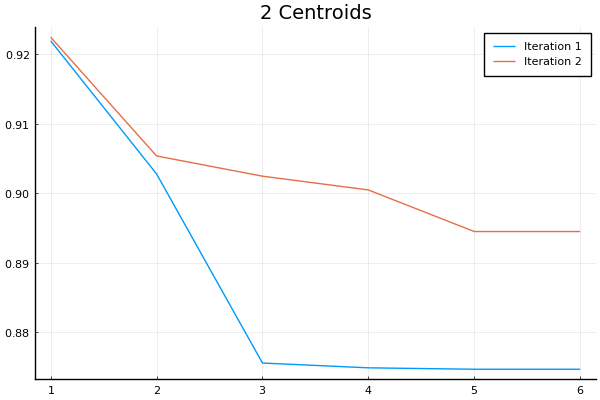

In [10]:
centroids_1, labels_1, j_hist_1 = Kmeans.kmeans(article_histograms, 2)
centroids_2, labels_2, j_hist_2 = Kmeans.kmeans(article_histograms, 2)

itr1 = 1:length(j_hist_1)
itr2 = 1:length(j_hist_2)

plot(itr1, j_hist_1, label="Iteration 1", title="2 Centroids")
plot!(itr2, j_hist_2, label="Iteration 2")


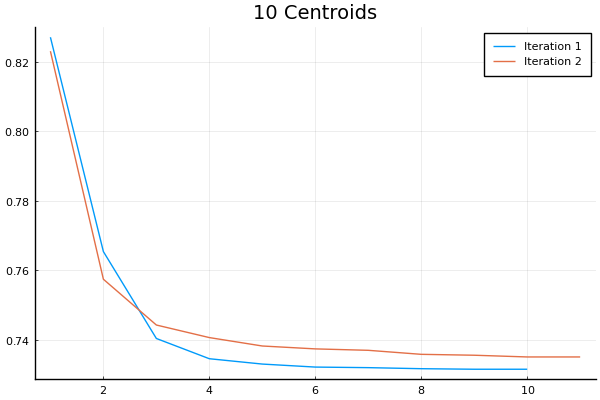

In [11]:
centroids_1, labels_1, j_hist_1 = Kmeans.kmeans(article_histograms, 10)
centroids_2, labels_2, j_hist_2 = Kmeans.kmeans(article_histograms, 10)

itr1 = 1:length(j_hist_1)
itr2 = 1:length(j_hist_2)

plot(itr1, j_hist_1, label="Iteration 1", title="10 Centroids")
plot!(itr2, j_hist_2, label="Iteration 2")

     

In [12]:
open("Cluster_Data.txt", "w") do file
    for i in 1:10
        topic = "Topic Number: $i"
        titles = join(article_titles[labels_2 .== i], ",")
        words = join(dictionary[sortperm(centroids_2[i], rev=true)], ",")
        content = "$topic\nTitles: $titles\nCommon Words: $words\n\n"
        write(file, content)
    end
end